## Задание - Реализовать Insertion Sort и Shell Sort 

#### Дополнительно:
- Протестировать работу алгоритмов на случайных массивах и на практически упорядоченных массивах, сравнить производительность. <br>
- Сравнить производительность сортировки Шелла c разной последовательностью шагов.

## Критерии оценки
- реализован только один алгоритм сортировки / есть серьезные недочеты в реализации, влияющие на производительность - 1 балл
- алгоритмы реализованы корректно, но есть небольшие недочеты, влияющие на производительность - 2 балла (2 "основных" балла - необходимый минимум для зачета)
- оба алгоритма реализованы корректно - 3 балла

#### Дополнительно:
- проведено сравнение производительности на разных массивах - 1 балл
- проведено сравнение производительности Shell sort с разными последовательностями шагов - 1 балл
- работа сдана вовремя - 1 балл

In [1]:
from typing import List, Optional, Callable
import random

# Insertion Sort

In [2]:
def insertion_sort(array: List, step: int = 1, start: int = 0):
    for i in range(start+step, len(array), step):
        x = array[i]
        j = i
        
        while j >= step and array[j-step] > x:
            array[j] = array[j-step]
            j -= step
        
        array[j] = x

## Тесты Insertion Sort

In [3]:
import time
import matplotlib.pyplot as plt  
import tqdm  # для отображения прогресс-бара

In [43]:
def profile(max_size, 
            sort_func, arr_gen_func=None, 
            sort_args={}, arr_gen_args={}, 
            runs_on_loop=10):
    """
    Профилирование работы функции сортировки
    
    Параметры:
    max_size - максимальный размер списка
    sort_func - функция сортировки, должна принимать на вход список и **kwargs
    arr_gen_func - функция для генерации списка, должна принимать на вход размер списка и **kwargs
    sort_args - доп. аргументы для sort_func
    arr_gen_args - доп. аргументы для arr_gen_func
    runs_on_loop - количество запусков в 1 итерации 
    """
    times = []
    sizes = []
    if not arr_gen_func:
        arr_gen_func = lambda size, **arr_gen_args: [random.randint(0, size) for _ in range(size)]
    
    sizes = []
    for i in range(1, 100):
        new_size = 4**i
        if new_size > max_size:
            break
        sizes.append(new_size)
    
    for arr_size in tqdm.tqdm(sizes):
        nested_time = []
        
        for _ in range(runs_on_loop):
            arr = arr_gen_func(arr_size, **arr_gen_args)
            start = time.process_time()
            sort_func(arr, **sort_args)
            nested_time.append(time.process_time() - start)
            
        times.append(sum(nested_time) / len(nested_time))
    return times, sizes

### Список со случайным порядком
 - Функция сортировки - insertion_sort со значениями по умолчанию
 - Размер списка - от 0 до 1000 с шагом 100
 - Функция генерации списка - случайный порядок


100%|██████████| 5/5 [00:00<00:00,  7.24it/s]


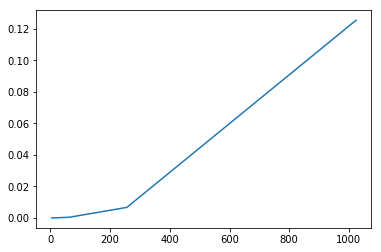

In [44]:
times, sizes = profile(1500, insertion_sort)
plt.plot(sizes, times)

In [45]:
sizes

[4, 16, 64, 256, 1024]

### Почти упорядоченный список
 - Функция сортировки - insertion_sort со значениями по умолчанию
 - Размер списка - от 0 до 1000 с шагом 100
 - Функция генерации списка - generate_almost_sorted с разной степенью упорядоченности


In [12]:
def generate_almost_sorted(size: int, shuffle_percents: int) -> List:
    """
    1. Генерируем список заданного размера
    2. Исходя из shuffle_percents рассчитываем шаг с которым мы мешаем элементы.
    Шаг=2 - меняем каждый 2 элемент со следующим
    Шаг=10 - меняем каждый 10 элемент со следующим
    и т.д.
    3. Если шаг находится в допустимых границах - перемешиваем элементы с полученным шагом
    
    Параметры:
    size: размер списка
    shuffle_percents: процент элементов в списке, которые нужно перемешать
    """
    array = list(range(size))
    
    step = int(100/shuffle_percents)
    if not (1 < step < len(array)):
        return array
    
    for i in range(0, len(array), step):
        array[i] = random.randint(0, size)
    
    return array

In [13]:
# shuffle_percents = 5%
times, sizes = profile(
    1000, 100, insertion_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 5},
    runs_on_loop=5
)
plt.plot(sizes, times)

TypeError: profile() got multiple values for argument 'arr_gen_func'


100%|██████████| 10/10 [00:00<00:00, 14.86it/s]

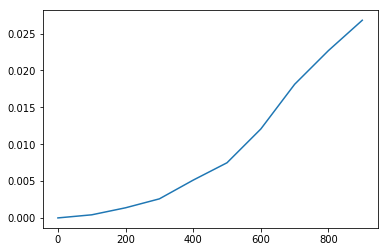

In [167]:
# shuffle_percents = 25%
times, sizes = profile(
    1000, 100, insertion_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 25},
    runs_on_loop=5
)
plt.plot(sizes, times)


100%|██████████| 10/10 [00:00<00:00, 10.46it/s]

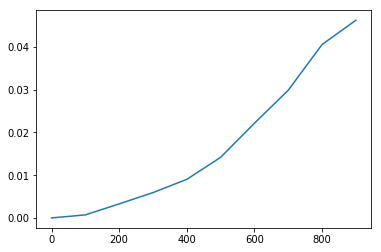

In [168]:
# shuffle_percents = 50%
times, sizes = profile(
    1000, 100, insertion_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 50},
    runs_on_loop=5
)
plt.plot(sizes, times)

# Shell Sort

In [164]:
def shell_sort(array: List, step_func: Optional[Callable] = None):
    step_func = step_func if step_func is not None else lambda d: d // 2
    
    i = 1
    step = step_func(len(array))
    while step > 0:
        for start in range(step):
            insertion_sort(array, step, start)
        step = step_func(step)
        i += 1

## Тесты Shell Sort

### Список со случайным порядком, Шаг: d = d // 2
 - Функция сортировки - shell_sort со значениями по умолчанию
 - Шаг: d = d // 2
 - Размер списка - от 0 до 1000 с шагом 100
 - Функция генерации списка - случайный порядок


100%|██████████| 10/10 [00:00<00:00, 14.25it/s]

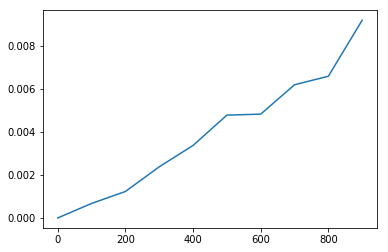

In [165]:
times, sizes = profile(
    1000, 100, shell_sort
)
plt.plot(sizes, times)

### Список со случайным порядком, Шаг: d = d // 5
 - Функция сортировки - shell_sort со значениями по умолчанию
 - Шаг: d = d // 5
 - Размер списка - от 0 до 1000 с шагом 100
 - Функция генерации списка - случайный порядок


100%|██████████| 10/10 [00:00<00:00, 19.15it/s]

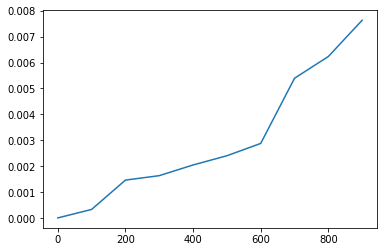

In [181]:
step_func = lambda d: d // 5
times, sizes = profile(
    1000, 100, shell_sort,
    sort_args={"step_func": step_func}
)
plt.plot(sizes, times)


100%|██████████| 10/10 [00:24<00:00,  4.45s/it]

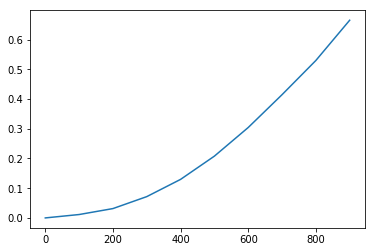

In [184]:
step_func = lambda d: d-1

times, sizes = profile(
    1000, 100, shell_sort,
    sort_args={"step_func": step_func}
)
plt.plot(sizes, times)

### Почти упорядоченный список, Шаг: d = d // 2
 - Функция сортировки - shell_sort со значениями по умолчанию
 - Шаг: d = d // 2
 - Размер списка - от 0 до 1000 с шагом 100
 - Функция генерации списка - generate_almost_sorted с разной степенью упорядоченности


100%|██████████| 10/10 [00:00<00:00, 64.37it/s]

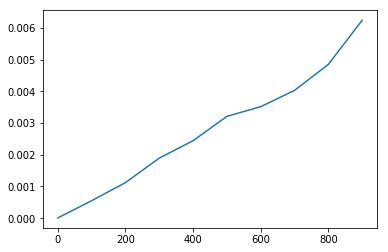

In [169]:
# shuffle_percents = 5%
times, sizes = profile(
    1000, 100, shell_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 5},
    runs_on_loop=5
)
plt.plot(sizes, times)


100%|██████████| 10/10 [00:00<00:00, 52.76it/s]

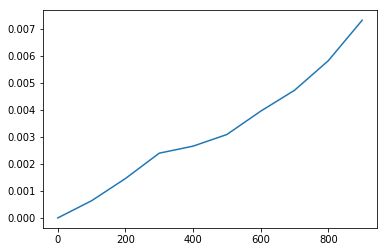

In [170]:
# shuffle_percents = 25%
times, sizes = profile(
    1000, 100, shell_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 25},
    runs_on_loop=5
)
plt.plot(sizes, times)


100%|██████████| 10/10 [00:00<00:00, 42.15it/s]

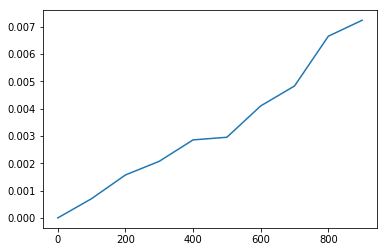

In [171]:
# shuffle_percents = 50%
times, sizes = profile(
    1000, 100, shell_sort, 
    arr_gen_func=generate_almost_sorted,
    arr_gen_args={"shuffle_percents": 50},
    runs_on_loop=5
)
plt.plot(sizes, times)